In [147]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
import pandas as pd
import numpy as np

from context import community_module
from community_module.community_detection.similarityCommunityDetection import SimilarityCommunityDetection
from community_module.community_detection.explainedCommunitiesDetection import ExplainedCommunitiesDetection
from community_module.visualization.gephiVisualization import GephiVisualization

from sklearn.metrics.pairwise import cosine_similarity

In [149]:
interactions_df = pd.read_csv('../../data/IMMA/citizenInteractions.csv')
interactions_df.head()

,userResponseID,artworkID,numInteractions
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,60c0927e0ee8234e932e7a1d,1
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c08c580ee8234e932e7a18,1
2,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c0908cb5b26479a17d1b33,1
3,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c09225b5b26479a17d1b3a,1
4,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,60c0927e0ee8234e932e7a1d,1


In [150]:
artworks = pd.read_json('../../data/IMMA/artworks_IMMA.json')
artworks

,_id,name,artist,date,description,notes,URL,image,audio,_datasetid,_timestamp,_timestamp_year,_timestamp_month,_timestamp_day,_timestamp_hour,_timestamp_minute,_timestamp_second,_updated
0,60c095321262e65eec197529,Back of Snowman,Gary Hume,2003,Gary Hume was one of a generation of artists w...,"IMMA Collection: Purchase, 2005",https://imma.ie/collection/back-of-snowman/,08GaryHume.jpg,08-BackSnowman-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482702,2021,7,28,15,31,42,True
1,60c094dcb78b241f4625bbb9,SENTINEL VIII,Catherine Lee,1999,"Born in Texas in 1950, Lee’s works are a hybri...","IMMA Collection: Donation, Sean Scully, 2005",https://imma.ie/collection/sentinel-viii/,07CatherineLee.jpg,07-Sentinel-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482652,2021,7,28,15,30,52,True
2,60c09476b84c4b312635d34c,Barrel,Fergus Martin,2020,"This artwork is by Fergus Martin, an Irish art...",Commissioned by the Office for Public Works fo...,,06FergusMartin.jpg,06-Barrel-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482593,2021,7,28,15,29,53,True
3,60c09437b5b26479a17d1b3c,217 5° Arc x 12,Bernar Venet,2008,"Born in 1941 in the south of France, Venet est...","IMMA Collection: Loan, collection of the artis...",https://imma.ie/collection/217-5-arc-x-12/,05BernarVenet.jpg,05-Arc-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482511,2021,7,28,15,28,31,True
4,60c0927e0ee8234e932e7a1d,The Drummer,Barry Flanagan,1996,"Born in Wales, Barry Flanagan studied at Birmi...","IMMA Collection: Donated by the artist, 2001",https://imma.ie/collection/the-drummer/,04BarryFlanagan.jpg,04-Drummer-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482440,2021,7,28,15,27,20,True
5,60c09225b5b26479a17d1b3a,8 Limestones cut to a specific size from rough...,Ulrich Rückriem,1988,Ulrich Rückreim is German and he lives in Colo...,"IMMA Collection: Purchase, 2001",https://imma.ie/collection/8-limestones-cut-to...,03UrichRuckreim.jpg,03-8Limestones-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482394,2021,7,28,15,26,34,True
6,60c0908cb5b26479a17d1b33,Untitled / Corrections D,Iran do Espírito Santo,2008,<p>Brazilian artist Iran do Espírito Santo’s w...,"IMMA Collection: Purchase, 2007",https://imma.ie/collection/untitled-correction...,02IrandoEspiritoSanto.jpg,02-UntitledCorrectionsD-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627482302,2021,7,28,15,25,2,True
7,60c08c580ee8234e932e7a18,Recurring Line: North/ South,Donald Urquhart,2007,<p>Scottish artist Donald Urquhart works in a ...,"IMMA Collection: Purchase, 2005",https://imma.ie/collection/recurring-line-nort...,01DonaldUrquhart.jpg,01-RecurringLine-Joan.mp3,a6ad7a45-3d69-44c2-8f57-e0830e748f0d,1627481698,2021,7,28,15,14,58,True


In [151]:
def get_name(artwork_id):
    return artworks['_id'] 

names_arts = interactions_df.apply(lambda row: artworks[artworks['_id'] == row['artworkID']].name.values[0], axis=1)

In [152]:
names_arts

0                                           The Drummer
1                          Recurring Line: North/ South
2                              Untitled / Corrections D
3     8 Limestones cut to a specific size from rough...
4                                           The Drummer
5                                       217 5° Arc x 12
6                                                Barrel
7                                         SENTINEL VIII
8                                       Back of Snowman
9                              Untitled / Corrections D
10    8 Limestones cut to a specific size from rough...
11                                          The Drummer
12                                        SENTINEL VIII
13                                          The Drummer
14                                               Barrel
15                                      Back of Snowman
16                         Recurring Line: North/ South
17                             Untitled / Correc

In [153]:
interactions_df['artworkID'] = names_arts

In [154]:
interactions_df

,userResponseID,artworkID,numInteractions
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,The Drummer,1
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Recurring Line: North/ South,1
2,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Untitled / Corrections D,1
3,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,8 Limestones cut to a specific size from rough...,1
4,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,The Drummer,1
5,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,217 5° Arc x 12,1
6,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Barrel,1
7,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,SENTINEL VIII,1
8,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,Back of Snowman,1
9,KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,Untitled / Corrections D,3


In [155]:
users_interactions = pd.pivot_table(interactions_df, values='numInteractions', index='userResponseID', columns='artworkID', fill_value=0)
users_interactions

artworkID,217 5° Arc x 12,8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form,Back of Snowman,Barrel,Recurring Line: North/ South,SENTINEL VIII,The Drummer,Untitled / Corrections D
userResponseID,,,,,,,,
81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,0,0,0,0,0,0,1,0
BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,1,1,1,1,1,1,1,1
KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,0,3,0,0,0,1,3,3
P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1,0,0,0,1,0,0,1,0
SUw10XRrB4A03Ral1MKas4sLgIW9P3lh,0,0,1,0,0,0,0,0
ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA,0,2,2,1,2,0,2,2
ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F,0,0,0,0,1,0,0,0
aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY,1,1,1,1,1,1,1,0
iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4,6,0,0,0,0,3,0,0


In [156]:
community_dectection = ExplainedCommunitiesDetection(users_interactions, SimilarityCommunityDetection, 'cosine')

In [157]:
n_communities, users_communities = community_dectection.search_all_communities(percentage=0.78)

In [158]:
users_interactions['community'] = users_communities.values()
users_interactions.reset_index(inplace=True)

In [159]:


# Preparamos los datos de usuarios y distancias
users = users_interactions[['userResponseID','community']].values
data = users_interactions.iloc[:,1:-1].values
distances = cosine_similarity(data)



In [160]:
# Pintamos en Gephi
#gv = GephiVisualization(workspace='imma')
#gv.load_community(users, distances, users_properties=['community'])

In [161]:
users_interactions[['userResponseID', 'community']]

artworkID,userResponseID,community
0,81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,0
1,BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,2
2,KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,6
3,P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1,0
4,SUw10XRrB4A03Ral1MKas4sLgIW9P3lh,3
5,ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA,2
6,ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F,5
7,aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY,2
8,iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4,1
9,k5SXzdwN9UPY2FXUC1vavDtk3CykTKXR,1


In [162]:
users_without_community = []
for c in range(n_communities):
    community_data = community_dectection.get_community(c, answer_binary=True)

    if len(community_data['members']) > 1:

        print('---------------------')
        print('COMMUNITY -', community_data['name'])
        print('\t- N. Members:', len(community_data['members']))
        print('\t- Properties:')

        for k in community_data['properties'].keys():
            print('\t\t-', k)
    else:
        users_without_community.extend(community_data['members'])

print('---------------------')
print('N. USERS WITHOUT COMMUNITY -', len(users_without_community))

---------------------
COMMUNITY - 0
	- N. Members: 2
	- Properties:
		- The Drummer
---------------------
COMMUNITY - 1
	- N. Members: 2
	- Properties:
		- 217 5° Arc x 12
		- SENTINEL VIII
---------------------
COMMUNITY - 2
	- N. Members: 3
	- Properties:
		- 8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form
		- Back of Snowman
		- Barrel
		- Recurring Line: North/ South
		- The Drummer
		- Untitled / Corrections D
---------------------
N. USERS WITHOUT COMMUNITY - 4


In [163]:
"""
Get centroid for each member
"""
"""

#community_dectection = ExplainedCommunitiesDetection(users_interactions, SimilarityCommunityDetection, 'cosine')
user = community_dectection.communityCentroid(88)
user
"""

fdsdfsdf
88
hsd
saaa
88
[[0.         0.         0.         0.5        0.         0.
  1.         0.        ]
 [3.5        0.         0.         0.         0.         1.5
  0.         0.        ]
 [0.66666667 1.33333333 1.33333333 1.         1.33333333 0.66666667
  1.33333333 1.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.         3.         0.         0.         0.         1.
  3.         3.        ]]


In [ ]:
"""
Get fictional user to represent the community (members average)
"""

In [99]:
"""
Clustering based on K-means
"""
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
#from sklearn.datasets import make_blobs

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [100]:
"""
# k-means
# k-means++: ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random". 
km = KMeans(init='k-means++', n_clusters=3, random_state=333)
# Agrupar los puntos en clusters
km.fit(X)
# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_
plot_clusters(X, labels, centers)
"""


'\n# k-means\n# k-means++: ensure centroids are initialized with some distance between them. In most cases, this will be an improvement over "random". \nkm = KMeans(init=\'k-means++\', n_clusters=3, random_state=333)\n# Agrupar los puntos en clusters\nkm.fit(X)\n# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster\nlabels = km.labels_\ncenters = km.cluster_centers_\nplot_clusters(X, labels, centers)\n'

In [101]:
users_interactions = pd.pivot_table(interactions_df, values='numInteractions', index='userResponseID', columns='artworkID', fill_value=0)
users_interactions_df = users_interactions.copy()
users_interactions

artworkID,217 5° Arc x 12,8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form,Back of Snowman,Barrel,Recurring Line: North/ South,SENTINEL VIII,The Drummer,Untitled / Corrections D
userResponseID,,,,,,,,
81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,0,0,0,0,0,0,1,0
BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,1,1,1,1,1,1,1,1
KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,0,3,0,0,0,1,3,3
P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1,0,0,0,1,0,0,1,0
SUw10XRrB4A03Ral1MKas4sLgIW9P3lh,0,0,1,0,0,0,0,0
ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA,0,2,2,1,2,0,2,2
ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F,0,0,0,0,1,0,0,0
aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY,1,1,1,1,1,1,1,0
iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4,6,0,0,0,0,3,0,0


In [102]:
users_interactions_values = users_interactions.values
users_interactions_values

array([[0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [0, 3, 0, 0, 0, 1, 3, 3],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 2, 2, 1, 2, 0, 2, 2],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0],
       [6, 0, 0, 0, 0, 3, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

In [103]:
k = 4
km = KMeans(init='k-means++', n_clusters=k, random_state=43)
km.fit(users_interactions_values)
# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
centers = km.cluster_centers_
#plot_clusters(users_interactions_values, labels, centers=None)

In [104]:
K_MAX = 10
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='k-means++', n_clusters=k, random_state=43)
    km.fit(users_interactions_values)
    
    score[k-2] = -1 * km.score(users_interactions_values)
    davies_boulding[k-2] = davies_bouldin_score(users_interactions_values, km.labels_)
    silhouette[k-2] = silhouette_score(users_interactions_values, km.labels_)

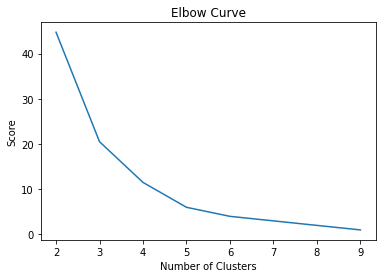

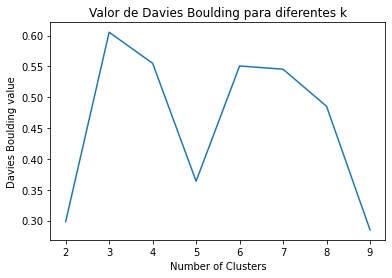

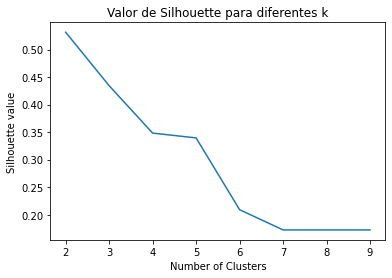

In [105]:
import matplotlib.pyplot as plt

# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

In [107]:
k = 5
km = KMeans(init='k-means++', n_clusters=k, random_state=43)
km.fit(users_interactions_values)
# Podemos consultar el cluster asignado a cada punto y el centro de cada cluster
labels = km.labels_
labels

array([0, 3, 4, 0, 0, 1, 0, 3, 2, 0, 0])

In [109]:
"""
from community_module.community_detection.kmeansCommunityDetection import KMeansCommunityDetection

kmeansCommunityDetection = ExplainedCommunitiesDetection(users_interactions, KMeansCommunityDetection)
#n_communities, users_communities = kmeansCommunityDetection.search_all_communities(percentage=0.78)
n_communities, users_communities = kmeansCommunityDetection.search_all_communities(percentage=0.3)

users_interactions_df['cluster'] = users_communities.values()
users_interactions_df
"""

ewrwer
{'81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO': 0, 'BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S': 3, 'KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I': 4, 'P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1': 0, 'SUw10XRrB4A03Ral1MKas4sLgIW9P3lh': 0, 'ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA': 1, 'ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F': 0, 'aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY': 3, 'iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4': 2, 'k5SXzdwN9UPY2FXUC1vavDtk3CykTKXR': 0, 'r6ojHpr4LeGQQcGcSXFGsFQVJzdGYwzE': 0}


artworkID,217 5° Arc x 12,8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form,Back of Snowman,Barrel,Recurring Line: North/ South,SENTINEL VIII,The Drummer,Untitled / Corrections D,cluster
userResponseID,,,,,,,,,
81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,0,0,0,0,0,0,1,0,0
BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,1,1,1,1,1,1,1,1,3
KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,0,3,0,0,0,1,3,3,4
P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1,0,0,0,1,0,0,1,0,0
SUw10XRrB4A03Ral1MKas4sLgIW9P3lh,0,0,1,0,0,0,0,0,0
ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA,0,2,2,1,2,0,2,2,1
ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F,0,0,0,0,1,0,0,0,0
aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY,1,1,1,1,1,1,1,0,3
iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4,6,0,0,0,0,3,0,0,2


In [41]:

users_interactions_df['cluster'] = km.labels_
users_interactions_df

artworkID,217 5° Arc x 12,8 Limestones cut to a specific size from rough blocks 150 x 50 x 50cm split into parts and reassembled into their original form,Back of Snowman,Barrel,Recurring Line: North/ South,SENTINEL VIII,The Drummer,Untitled / Corrections D,cluster
userResponseID,,,,,,,,,
81PfE8l9tbFhtvxOE6X5VOh2UpBiYgCO,0,0,0,0,0,0,1,0,0
BZXf8rM1IAoDUtW01ShxYw8MxjHtGF5S,1,1,1,1,1,1,1,1,3
KL32ozS4irwGu3JtWd0x5p8AV9kXlS9I,0,3,0,0,0,1,3,3,4
P4M8Uto1UwzTd3OKOns3LZ7hIxBheAg1,0,0,0,1,0,0,1,0,0
SUw10XRrB4A03Ral1MKas4sLgIW9P3lh,0,0,1,0,0,0,0,0,0
ScOlinhmp6Rxo9aqywrKMR8J0S90qNQA,0,2,2,1,2,0,2,2,1
ZqNE3fNu8JXVIadgc5epXYofaOtgEE7F,0,0,0,0,1,0,0,0,0
aQIxJWU4S2YAOGA93ItHtmuEeNbhudnY,1,1,1,1,1,1,1,0,3
iCY4NVfyljZxazkltmZh5YiAnY2b3Rm4,6,0,0,0,0,3,0,0,2


In [110]:
describe_df = users_interactions_df.groupby(["cluster"]).describe().transpose()
#describe_df.loc[['217 5° Arc x 12']]
describe_df

cluster                                0    1    2     3    4
artworkID                                                    
217 5° Arc x 12          count  6.000000  1.0  1.0  2.00  1.0
                         mean   0.166667  0.0  6.0  1.00  0.0
                         std    0.408248  NaN  NaN  0.00  NaN
                         min    0.000000  0.0  6.0  1.00  0.0
                         25%    0.000000  0.0  6.0  1.00  0.0
...                                  ...  ...  ...   ...  ...
Untitled / Corrections D min    0.000000  2.0  0.0  0.00  3.0
                         25%    0.000000  2.0  0.0  0.25  3.0
                         50%    0.000000  2.0  0.0  0.50  3.0
                         75%    0.000000  2.0  0.0  0.75  3.0
                         max    1.000000  2.0  0.0  1.00  3.0

[64 rows x 5 columns]

In [111]:
describe_df.loc[['SENTINEL VIII']]

cluster                0    1    2    3    4
artworkID                                   
SENTINEL VIII count  6.0  1.0  1.0  2.0  1.0
              mean   0.0  0.0  3.0  1.0  1.0
              std    0.0  NaN  NaN  0.0  NaN
              min    0.0  0.0  3.0  1.0  1.0
              25%    0.0  0.0  3.0  1.0  1.0
              50%    0.0  0.0  3.0  1.0  1.0
              75%    0.0  0.0  3.0  1.0  1.0
              max    0.0  0.0  3.0  1.0  1.0

In [ ]:
import seaborn as sns

sns.pairplot(users_interactions_df, diag_kind='kde', hue="cluster")

In [ ]:
"""
DBSCAN Algorithm
"""

